use Random Forest to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import  RandomForestClassifier



#Data Reading and Preprocessing

In [2]:
data=pd.read_csv("/content/Fraud_check.csv")

In [3]:
data.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
Data=pd.DataFrame(data)

In [5]:
Data=Data[["Undergrad","Marital.Status","City.Population", "Work.Experience", "Urban", "Taxable.Income"]]
Data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700
2,NO,Married,160205,30,YES,36925
3,YES,Single,193264,15,YES,50190
4,NO,Married,27533,28,NO,81002


In [6]:
label_encoder = preprocessing.LabelEncoder()
Data['Undergrad']= label_encoder.fit_transform(Data['Undergrad'])
Data['Marital.Status']= label_encoder.fit_transform(Data['Marital.Status'])
Data['Urban']= label_encoder.fit_transform(Data['Urban'])

In [7]:
def categorize(income):
    if income <= 30000:
        return 'Risky'
    else:
        return 'Good'


Data['Taxable.Income'] = Data['Taxable.Income'].apply(categorize)

In [8]:
Data.head(15)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
5,0,0,116382,0,0,Good
6,0,0,80890,8,1,Good
7,1,2,131253,3,1,Good
8,0,2,102481,12,1,Good
9,1,0,155482,4,1,Good


In [9]:
Data.value_counts("Taxable.Income")    #Imbalance data

Taxable.Income
Good     476
Risky    124
dtype: int64

In [10]:
Data.shape

(600, 6)

In [11]:
Data.isna().sum()

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
Taxable.Income     0
dtype: int64

In [12]:
Data.corr()

<ipython-input-12-89628327d5af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data.corr()


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000


<ipython-input-13-ef30ff5187dc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr(),annot=True)


<Axes: >

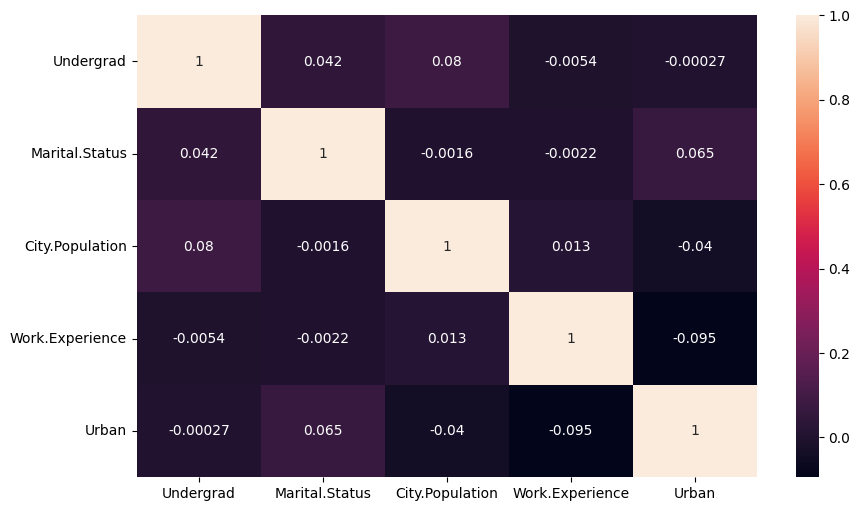

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(Data.corr(),annot=True)

<ipython-input-78-bea6fe0d1ad7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Work.Experience"])


<Axes: xlabel='Work.Experience', ylabel='Density'>

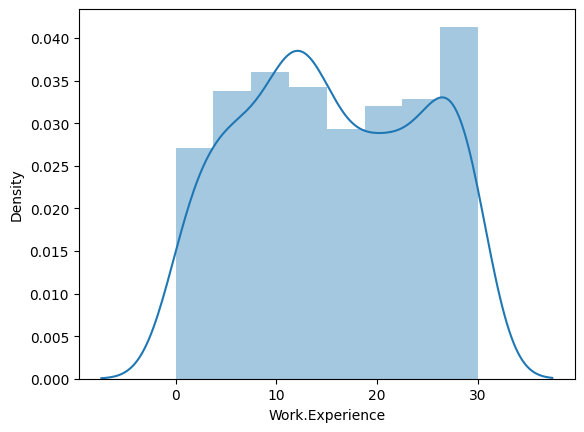

In [78]:
sns.distplot(data["Work.Experience"])

In [15]:
x=Data.iloc[:,:5]
y=Data.iloc[:,5]

In [16]:
x,y

(     Undergrad  Marital.Status  City.Population  Work.Experience  Urban
 0            0               2            50047               10      1
 1            1               0           134075               18      1
 2            0               1           160205               30      1
 3            1               2           193264               15      1
 4            0               1            27533               28      0
 ..         ...             ...              ...              ...    ...
 595          1               0            39492                7      1
 596          1               0            55369                2      1
 597          0               0           154058                0      1
 598          1               1           180083               17      0
 599          0               0           158137               16      0
 
 [600 rows x 5 columns],
 0      Good
 1      Good
 2      Good
 3      Good
 4      Good
        ... 
 595    Good
 596  

In [17]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=15)

#Model

In [18]:
model = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5,max_depth=5,)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [19]:
pred = model.predict(x_test)


In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        Good       0.82      0.94      0.88       100
       Risky       0.00      0.00      0.00        20

    accuracy                           0.78       120
   macro avg       0.41      0.47      0.44       120
weighted avg       0.69      0.78      0.73       120



In [21]:
model.feature_importances_

array([0.03348829, 0.06131101, 0.74689738, 0.08645736, 0.07184595])

[Text(0.5089285714285714, 0.9166666666666666, 'x[2] <= 197770.0\ngini = 0.339\nsamples = 480\nvalue = [376, 104]'),
 Text(0.4732142857142857, 0.75, 'x[2] <= 60294.5\ngini = 0.334\nsamples = 476\nvalue = [375, 101]'),
 Text(0.23214285714285715, 0.5833333333333334, 'x[2] <= 49488.0\ngini = 0.259\nsamples = 111\nvalue = [94, 17]'),
 Text(0.14285714285714285, 0.4166666666666667, 'x[4] <= 0.5\ngini = 0.337\nsamples = 70\nvalue = [55, 15]'),
 Text(0.07142857142857142, 0.25, 'x[2] <= 34396.5\ngini = 0.426\nsamples = 39\nvalue = [27, 12]'),
 Text(0.03571428571428571, 0.08333333333333333, 'gini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(0.10714285714285714, 0.08333333333333333, 'gini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(0.21428571428571427, 0.25, 'x[3] <= 20.0\ngini = 0.175\nsamples = 31\nvalue = [28, 3]'),
 Text(0.17857142857142858, 0.08333333333333333, 'gini = 0.245\nsamples = 21\nvalue = [18, 3]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),

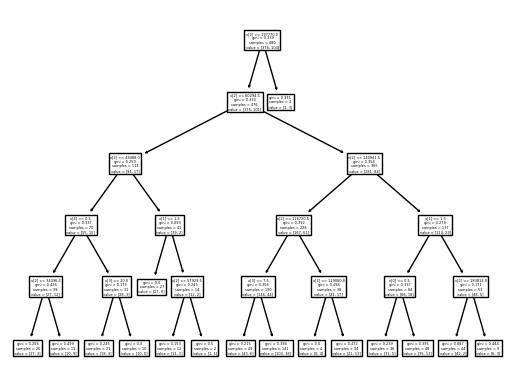

In [22]:
tree.plot_tree(model)

#RandomForest Model using Smote

In [70]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [71]:
x, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [77]:
x,y

(array([[-2.59816534e-01, -3.12491348e-01, -1.31384594e+00, ...,
          2.03799964e+00,  1.24989650e+00,  5.25719806e-01],
        [ 9.92252126e-01,  5.61855469e-04, -1.29784421e-01, ...,
          1.76895576e+00,  6.10236006e-01,  1.20070775e+00],
        [-2.61300111e-01,  4.15475152e-01, -1.51853634e+00, ...,
          2.25542565e+00, -5.93674512e-02, -2.46197971e+00],
        ...,
        [-9.74790878e-01, -1.35564930e+00, -2.25150653e+00, ...,
          2.21028481e+00, -1.07223595e+00, -1.26660882e-01],
        [ 1.74488199e-01, -7.29036428e-01, -9.48593005e-01, ...,
          1.46723474e+00,  4.37822879e-01, -9.63760598e-01],
        [ 6.22602338e-01, -1.03537589e+00, -3.23606081e+00, ...,
          1.73916950e+00,  1.15481512e+00,  2.59338575e+00]]),
 array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       

In [72]:
x_resampled, y_resampled = smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)


In [73]:
model2 = RandomForestClassifier(random_state=42)

In [74]:
model2.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [75]:
pred2 = model.predict(x_test)

In [76]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       179
           1       1.00      1.00      1.00       181

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360

